In [ ]:
#1
import numpy as np

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return x * (1 - x)

class MLP:
    def __init__(self):
        self.w1 = np.random.rand(2, 2)
        self.w2 = np.random.rand(2, 1)

    def train(self, X, y, epochs=10000):
        for _ in range(epochs):
            hidden = sigmoid(np.dot(X, self.w1))
            output = sigmoid(np.dot(hidden, self.w2))
            output_error = y - output
            self.w2 += np.dot(hidden.T, output_error * sigmoid_derivative(output))
            hidden_error = np.dot(output_error, self.w2.T)
            self.w1 += np.dot(X.T, hidden_error * sigmoid_derivative(hidden))

    def predict(self, x):
        hidden = sigmoid(np.dot(x, self.w1))
        return sigmoid(np.dot(hidden, self.w2))


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP()
mlp.train(X, y)
print("XOR Results:")
for test in X:
    result = np.round(mlp.predict(test)[0])
    print(f"XOR({test[0]}, {test[1]}) = {int(result)}")



XOR Results:
XOR(0, 0) = 0
XOR(0, 1) = 0
XOR(1, 0) = 1
XOR(1, 1) = 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:

Training with Adam Optimizer:


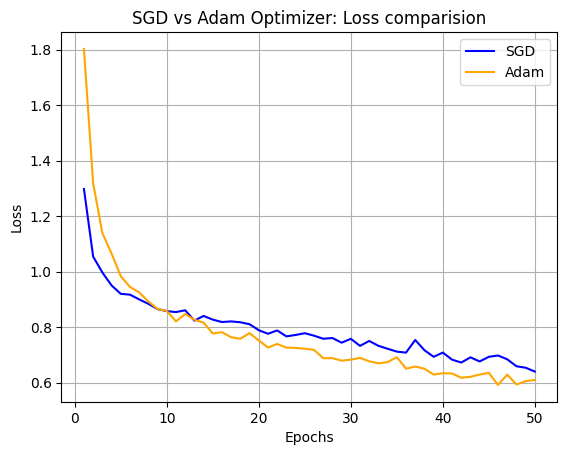

In [ ]:
#2
#modification : used callbacks function and BatchNormalization
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X=np.random.randn(1000,10)
    y=np.random.randn(1000,1)
    return X,y

def create_model():
  model = models.Sequential([
      layers.Dense(50,activation='relu',input_shape=(10,)),
      layers.BatchNormalization(),
      layers.Dense(20,activation='relu'),
      layers.BatchNormalization(),
      layers.Dense(1)
  ])
  return model

def train_model(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_squared_error')
  stop=EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
  history=model.fit(X,y,batch_size=batch_size,epochs=epochs,verbose=0,callbacks=[stop])
  return history.history['loss']


  for epoch in range(epochs):
    hist=model.fit(X,y,batch_size=batch_size,epochs=1,verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs}-{optimizer_name} Loss:{loss:4f}")
  return history

X,y=create_data()
model_sgd=create_model()
model_adam=create_model()
optimizer_sgd=optimizers.SGD(learning_rate=0.01)
optimizer_adam=optimizers.Adam(learning_rate=0.001)

epochs=50
batch_size=32

print("\nTraining with SGD Optimizer:")
sgd_loss=train_model(model_sgd,optimizer_sgd,X,y,batch_size,epochs,'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss=train_model(model_adam,optimizer_adam,X,y,batch_size,epochs,'Adam')
plt.plot(range(1,epochs+1),sgd_loss,label='SGD',color='blue')
plt.plot(range(1,epochs+1),adam_loss,label='Adam',color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss comparision')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8969 - loss: 0.3337 - val_accuracy: 0.9871 - val_loss: 0.0379
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9844 - loss: 0.0468 - val_accuracy: 0.9877 - val_loss: 0.0386
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.9910 - val_loss: 0.0278
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9868 - loss: 0.0363
Test Accuracy:0.9909999966621399


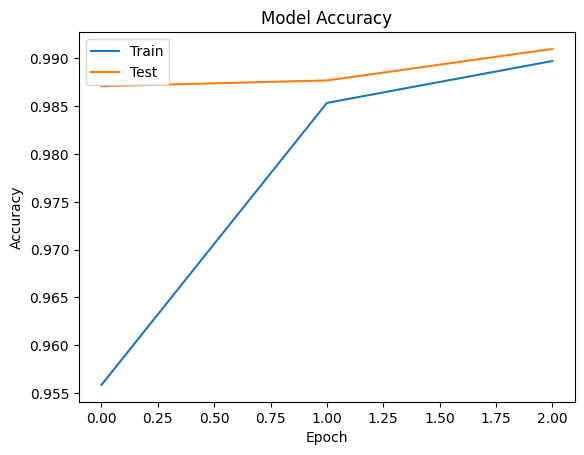

Test Loss:0.027843432500958443


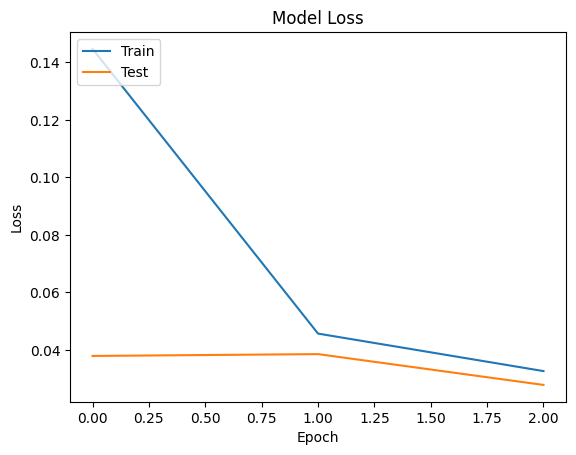

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9924 - loss: 0.0233 - val_accuracy: 0.9889 - val_loss: 0.0343
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9918 - val_loss: 0.0271
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9889 - val_loss: 0.0344
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9852 - loss: 0.0420
Test Accuracy:0.9889000058174133


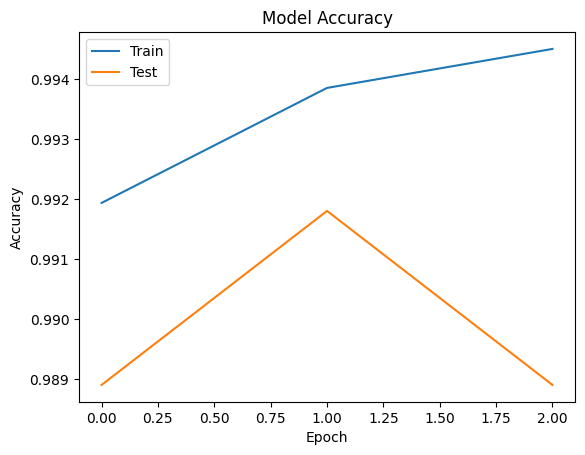

Test Loss:0.034385278820991516


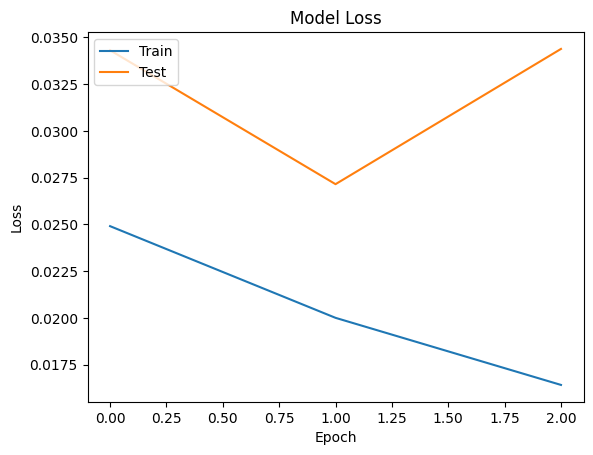

In [7]:
#3
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

(train_imgs,train_labels),(test_imgs,test_labels)=datasets.mnist.load_data()
train_imgs=train_imgs.reshape((train_imgs.shape[0],28,28,1)).astype('float32')/255
test_imgs=test_imgs.reshape((test_imgs.shape[0],28,28,1)).astype('float32')/255

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist_max=model.fit(train_imgs,train_labels,epochs=3,validation_data=(test_imgs,test_labels))
test_loss,test_acc=model.evaluate(test_imgs,test_labels)
print(f'Test Accuracy:{test_acc}')

plt.plot(hist_max.history['accuracy'])
plt.plot(hist_max.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

print(f'Test Loss:{test_loss}')

plt.plot(hist_max.history['loss'])
plt.plot(hist_max.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

model_avg_pool = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_avg_pool.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

hist_avg=model.fit(train_imgs,train_labels,epochs=3,validation_data=(test_imgs,test_labels))
test_loss1,test_acc1=model.evaluate(test_imgs,test_labels)
print(f'Test Accuracy:{test_acc1}')

plt.plot(hist_avg.history['accuracy'])
plt.plot(hist_avg.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

print(f'Test Loss:{test_loss1}')

plt.plot(hist_avg.history['loss'])
plt.plot(hist_avg.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

